# Cuisine prediction following Data Science Methodology

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 10px">

1. [Introduction](#0)<br>
2. [From Problem to Approach](#1)<br>
3. [From Requirements to Collection](#2)<br>
4. [From Understanding to Preparation](#3)<br>
5. [From Modeling to Evaluation](#4)<br>
6. [Conclusion](#5)<br>
</div>
<hr>

<a id="0"></a>
## Introduction

The aim of these notebook is to **reinforce the concepts of CRISP-DM, a Data Science Methodology that is followed through a project using a case study.** Here, we will be working on a problem of **"Automated Prediction of the cuisine of a given dish or recipe using the Ingredient Features".**

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig2_datascience_methodology_flowchart.png" width = 500> 

<a id="1"></a>
## From Problem to Approach  
____

### Probelm:

Problem Statement is to build a classification model that can determine the cuisine of a given dish with the information provided. Information provided can be Dish names, their prices,  main ingredient or the list of all ingredients.

As you might guess, determining the cuisine of a given dish based on its ingredients seems like a viable solution as some ingredients are unique to cuisines. For example:

* When we talk about **American** cuisines, the first ingredient that comes to one's mind (or at least to my mind =D) is beef or turkey.

* When we talk about **British** cuisines, the first ingredient that comes to one's mind is haddock or mint sauce.

* When we talk about **Canadian** cuisines, the first ingredient that comes to one's mind is bacon or poutine.

* When we talk about **French** cuisines, the first ingredient that comes to one's mind is bread or butter.

* When we talk about **Italian** cuisines, the first ingredient that comes to one's mind is tomato or ricotta.

* When we talk about **Japanese** cuisines, the first ingredient that comes to one's mind is seaweed or soy sauce.

* When we talk about **Chinese** cuisines, the first ingredient that comes to one's mind is ginger or garlic.

* When we talk about **indian** cuisines, the first ingredient that comes to one's mind is masala or chillis.

### Analytic Approach:

#### Let's explore classification machine learning algorithms, such as Logistic Regression, Naive Bayes Classifier, Nearest Neighbor, Support Vector Machines, Decision Trees, Boosted Trees, Random Forest, Neural Networks, and see which is the right technique to automate the process of identifying the cuisine of a given dish or recipe while simultaneously providing us with some insight on why a given recipe is believed to belong to a certain type of cuisine.

#### In order to build a very powerful decision tree for the recipe case study, let's take some time to learn more about decision trees.

* Decision trees are built using recursive partitioning to classify the data.
* When partitioning the data, decision trees use the most predictive feature (ingredient in this case) to split the data.
* **Predictiveness** is based on decrease in entropy - gain in information, or *impurity*.

#### A tree stops growing at a node when:
* Pure or nearly pure.
* No remaining variables on which to further subset the data.
* The tree has grown to a preselected size limit.

#### Here are some characteristics of decision trees:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab1_fig8_decision_trees_table.png" width=800>

**Thus, we will use decision tree from scikit-learn to create a classifier using the ingredients of the dish to identify the respective cuisines.**

<a id="2"></a>
## From Requirements to Collection

___

### Requirements:

As discussed in "Problem to Approach" section, we need the details about the ingredients used in the recipe of the dishes from various cuisines. The amount of dishes and their ingredients has to be enough in size such that a good classifier can be trained using it and some of the dishes will be used to check the performance of the classifier in later part.

### Collection:

For the above stated requirement, I am using the dataset found at Kaggle in json format probably being extracted by web scrapping. It can be found [here](https://www.kaggle.com/c/whats-cooking).

The collected data looks like as follow:

In [64]:
# import required libraries

import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from sklearn import svm
import itertools
import random

In [57]:
import timeit
from datetime import timedelta

In [2]:
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud

In [4]:
# !conda install python-graphviz --yes
import graphviz

In [5]:
with open('train.json') as data_file:    
    traindata = json.load(data_file)

In [6]:
len(traindata)

39774

There are total **39,774** dishes in the raw dataset.

In [7]:
traindata[:10]

[{'id': 10259,
  'cuisine': 'greek',
  'ingredients': ['romaine lettuce',
   'black olives',
   'grape tomatoes',
   'garlic',
   'pepper',
   'purple onion',
   'seasoning',
   'garbanzo beans',
   'feta cheese crumbles']},
 {'id': 25693,
  'cuisine': 'southern_us',
  'ingredients': ['plain flour',
   'ground pepper',
   'salt',
   'tomatoes',
   'ground black pepper',
   'thyme',
   'eggs',
   'green tomatoes',
   'yellow corn meal',
   'milk',
   'vegetable oil']},
 {'id': 20130,
  'cuisine': 'filipino',
  'ingredients': ['eggs',
   'pepper',
   'salt',
   'mayonaise',
   'cooking oil',
   'green chilies',
   'grilled chicken breasts',
   'garlic powder',
   'yellow onion',
   'soy sauce',
   'butter',
   'chicken livers']},
 {'id': 22213,
  'cuisine': 'indian',
  'ingredients': ['water', 'vegetable oil', 'wheat', 'salt']},
 {'id': 13162,
  'cuisine': 'indian',
  'ingredients': ['black pepper',
   'shallots',
   'cornflour',
   'cayenne pepper',
   'onions',
   'garlic paste',
   'm

<a id="3"></a>
## From Understanding to Preparation

___

### Data Understanding

Data understanding is the exploration part of the raw data and understand the format of the content and data types. This enable us to prepare for the next step that is **Data Preparation**. In this step we discover how the row data can be transformed into the required format for the modeling and evaluation.  

In [8]:
# examine the number of different keys present in the raw dataset
traindata[0]

{'id': 10259,
 'cuisine': 'greek',
 'ingredients': ['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']}

There are 3 main keys which can be the columns of our final dataset: **"id", "cuisine", "ingredients"**

In [9]:
# how to fetch required details separately from raw data:
traindata[0]['id']

10259

In [10]:
traindata[0]['cuisine']

'greek'

In [11]:
traindata[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

### Data Preparation:

As shown above, for the 1st dish present in the raw dataset, let us create a dataframe having details about all the dishes present along with the specified 3 different columns.

## To see the preparation of the required CSV file from the json files available, see the file "json to csv for cuisine prediction".

In the column "ingredients", all the ingredients for each dish is present in the form of a list. Let us convert the ingredients in the form of different columns named by the ingredients. Respective presence of the ingredients will be marked by '1' or '0' otherwise in each dishes commonly known as "One-Hot-Encoding".

In [12]:
train_validation_data = pd.read_csv("train_validation_data.csv")

In the column "ingredients", all the ingredients for each dish is present in the form of a list. Let us convert the ingredients in the form of different columns named by the ingredients. Respective presence of the ingredients will be marked by '1' or '0' otherwise in each dishes commonly known as "One-Hot-Encoding".

ID's are not going to play any role in prediction using machine learning algorithms. So column ID should be dropped.

In [14]:
dataset_final = train_validation_data.drop(['id'], axis=1)

**We have finally prepared the required dataset ready for the next stage. Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.**

In [15]:
dataset_final.head()

,cuisine,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonÂ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,greek,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,southern_us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,filipino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,indian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Let's count the dishes per cuisine.**

In [16]:
dataset_final["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

**Let's count the ingredients across all recipes.**

In [17]:
# sum each column
ing = dataset_final.iloc[:, 1:].sum(axis=0)

In [18]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

                                             ingredient    count
0                                       romaine lettuce    270.0
1                                          black olives    229.0
2                                        grape tomatoes    228.0
3                                                garlic   7380.0
4                                                pepper   4438.0
5                                          purple onion   1896.0
6                                             seasoning    137.0
7                                        garbanzo beans    148.0
8                                  feta cheese crumbles    358.0
9                                           plain flour    154.0
10                                        ground pepper    385.0
11                                                 salt  18048.0
12                                             tomatoes   3058.0
13                                  ground black pepper   4784.0
14                       

Now we have a dataframe of ingredients and their total counts across all recipes. Let's sort this dataframe in descending order.

In [21]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

                        ingredient    count
0                             salt  18048.0
1                           onions   7972.0
2                        olive oil   7971.0
3                            water   7457.0
4                           garlic   7380.0
...                            ...      ...
6709                      rice mix      1.0
6710           tandoori masala mix      1.0
6711  english breakfast tea leaves      1.0
6712            jerk rub seasoning      1.0
6713       crushed cheese crackers      1.0

[6714 rows x 2 columns]


**Plot 20 most used ingredients**

<BarContainer object of 20 artists>

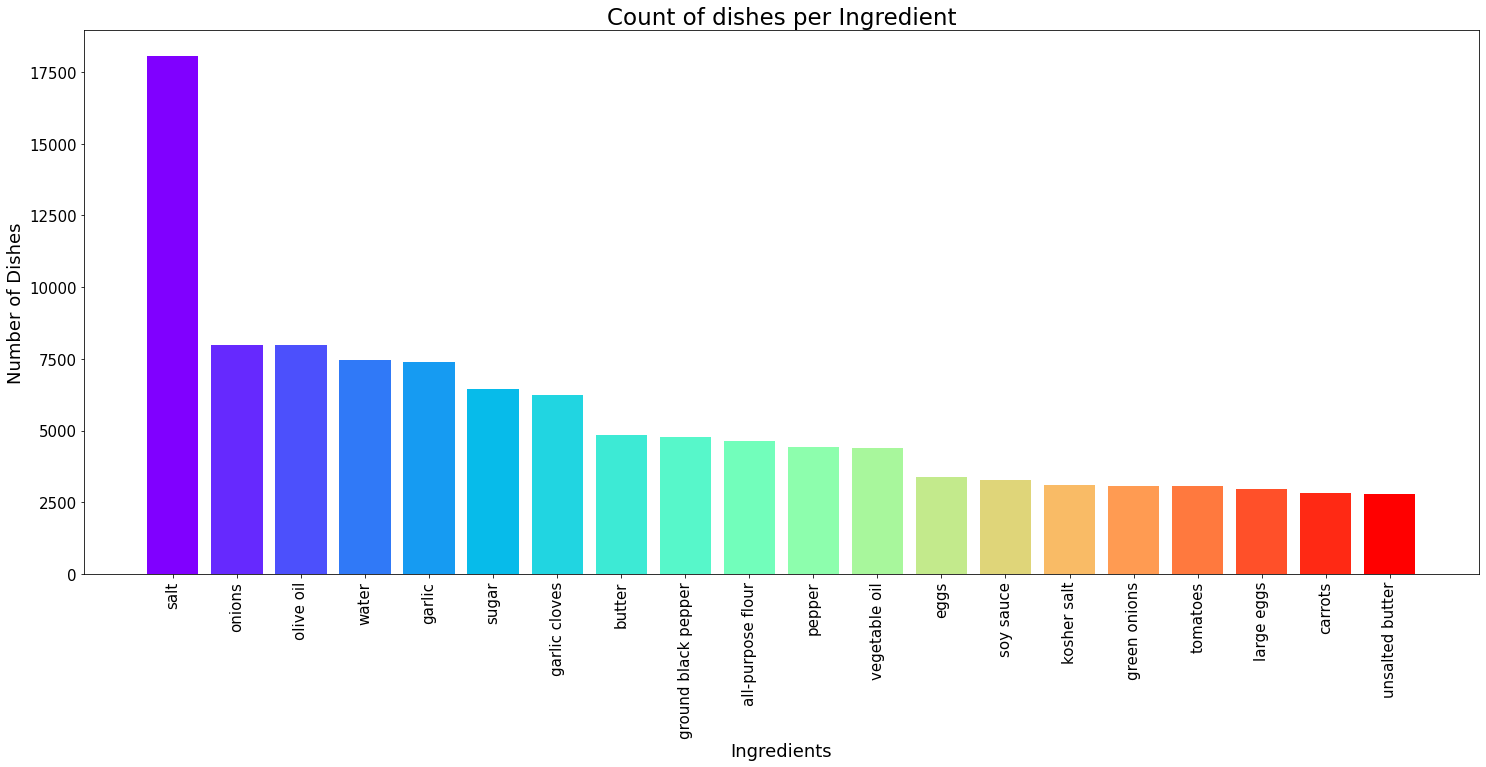

In [22]:
plot_ingredients = ing_df[:20]
ingredient = plot_ingredients['ingredient'].values
count = plot_ingredients['count'].values
colors = cm.rainbow(np.linspace(0, 1, len(plot_ingredients)))
plt.figure(figsize = (25, 10))
plt.xlabel("Ingredients", fontsize = 18)
plt.xticks(fontsize = 15, rotation=90)
plt.ylabel("Number of Dishes", fontsize = 18)
plt.yticks(fontsize = 15)
plt.title("Count of dishes per Ingredient", fontsize = 23)
plt.bar(ingredient, count, color = colors)

**Plot wordcloud for the ingredients**

In [23]:
d = {}
for i in range(len(ing_df)):
    name = ing_df['ingredient'][i]
    value = int(ing_df['count'][i])
    d[name] = value

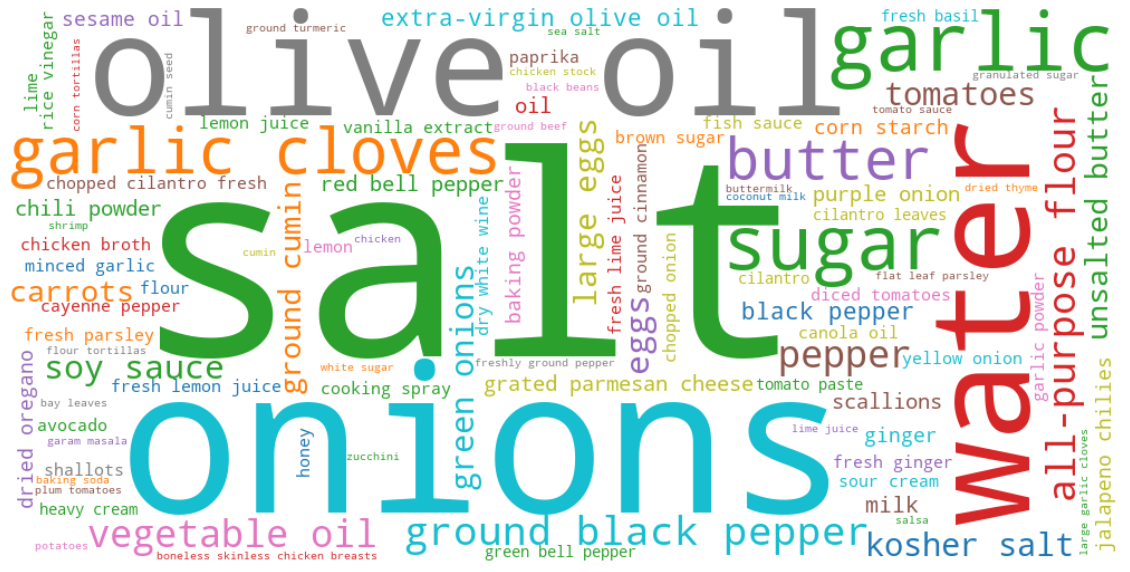

In [24]:
# Plot the word cloud of the most commonly used ingredients
fig = plt.figure(figsize=(20,20))
wc = WordCloud(background_color='white', colormap='tab10', width=1000, height=500, max_words=100).generate_from_frequencies(d)
ax=plt.imshow(wc, interpolation='bilinear')
b=plt.axis('off')
plt.savefig("wordcloud.png", bbox_inches='tight', dpi=300)

**Let's create a *profile* for each cuisine by displaying the top four ingredients in each cuisine.**

In [25]:
cuisines = dataset_final.groupby("cuisine").mean()
cuisines

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonÂ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.000000,0.000000,0.000000,0.175589,0.119914,0.017131,0.002141,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
british,0.000000,0.000000,0.000000,0.042289,0.109453,0.013682,0.002488,0.000000,0.000000,0.044776,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
cajun_creole,0.007762,0.001294,0.003234,0.239327,0.122251,0.024580,0.016171,0.001294,0.000647,0.003234,...,0.000647,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
chinese,0.004863,0.000000,0.000748,0.285447,0.059110,0.012346,0.004115,0.000374,0.000374,0.005612,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000374,0.000000,0.000000
filipino,0.000000,0.000000,0.001325,0.430464,0.263576,0.017219,0.002649,0.006623,0.000000,0.002649,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
french,0.004535,0.007937,0.004913,0.080877,0.078987,0.024187,0.000378,0.000378,0.001134,0.001890,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
greek,0.033191,0.026383,0.022128,0.183830,0.172766,0.158298,0.002553,0.019574,0.214468,0.005106,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000851,0.000000,0.000000,0.000000
indian,0.000999,0.000000,0.001665,0.241758,0.068265,0.056610,0.001665,0.011988,0.000999,0.007992,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
irish,0.001499,0.000000,0.000000,0.076462,0.130435,0.004498,0.002999,0.000000,0.000000,0.010495,...,0.000000,0.001499,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

In [27]:
# apply function to our dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

BRAZILIAN
salt (41%) onions (28%) olive oil (25%) lime (19%) 

BRITISH
salt (50%) all-purpose flour (29%) butter (27%) milk (25%) 

CAJUN_CREOLE
salt (48%) onions (34%) garlic (23%) green bell pepper (21%) 

CHINESE
soy sauce (50%) sesame oil (34%) salt (33%) corn starch (33%) 

FILIPINO
salt (55%) garlic (43%) water (41%) onions (41%) 

FRENCH
salt (45%) sugar (24%) all-purpose flour (22%) unsalted butter (22%) 

GREEK
salt (48%) olive oil (42%) dried oregano (22%) garlic cloves (21%) 

INDIAN
salt (64%) onions (39%) garam masala (28%) water (27%) 

IRISH
salt (56%) all-purpose flour (32%) butter (32%) onions (19%) 

ITALIAN
salt (44%) olive oil (39%) garlic cloves (20%) grated parmesan cheese (20%) 

JAMAICAN
salt (63%) onions (32%) water (29%) garlic (26%) 

JAPANESE
soy sauce (39%) salt (29%) mirin (28%) sugar (28%) 

KOREAN
soy sauce (51%) sesame oil (48%) garlic (36%) green onions (35%) 

MEXICAN
salt (42%) onions (23%) ground cumin (20%) garlic (20%) 

MOROCCAN
salt (50%) olive 

**At this point, we feel that we have understood the data well and the data is ready and is in the right format for modeling!**

<a id="4"></a>
## From Modeling to Evaluation

___

### Data Modeling:

Let's build our decision tree using the **"cuisine" as the prediction labels** and **"all the ingredients columns" as the features. We will take train to test ratio as 80:20.**

**Note:** One can use "X_train, X_test, y_train, y_test = train_test_split(ingredients, cuisines, test_size=0.20, random_state=7)". Instead of using this, **I am using the following method to ensure the equal proportion presence of all the cuisines in the test set.**  
20 cuisines * 395 per each cuisine = 7900 i.e. approximately 20% of whole

In [28]:
n = 395
random.seed(1234) # set random seed
test = dataset_final.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(n))

X_test = test.iloc[:,1:] # test_ingredients
y_test = test["cuisine"] # test_cuisines or labels

In [29]:
test["cuisine"].value_counts()

filipino        395
brazilian       395
thai            395
mexican         395
indian          395
moroccan        395
irish           395
vietnamese      395
chinese         395
korean          395
jamaican        395
french          395
cajun_creole    395
british         395
italian         395
japanese        395
russian         395
spanish         395
southern_us     395
greek           395
Name: cuisine, dtype: int64

In [30]:
test_index = dataset_final.index.isin(test.index)
train = dataset_final[~test_index]

X_train = train.iloc[:,1:] # train_ingredients
y_train = train["cuisine"] # train_cuisines or labels

### Model Evaluation:

In [31]:
from sklearn.tree import DecisionTreeClassifier
depths = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [32]:
Ds = len(depths)
acc_score = np.zeros((Ds))

for n in range(Ds):
    dt = DecisionTreeClassifier(max_depth = depths[n])
    dt.fit(X_train,y_train)
    y_hat = dt.predict(X_test)
    acc_score[n] = accuracy_score(y_test, y_hat)
    print("Done for {}".format(depths[n]))
acc_score

0
1
2
3
4
5
6
7
8
9


array([0.18936709, 0.27177215, 0.31936709, 0.33518987, 0.35873418,
       0.36746835, 0.37481013, 0.38949367, 0.3935443 , 0.40126582])

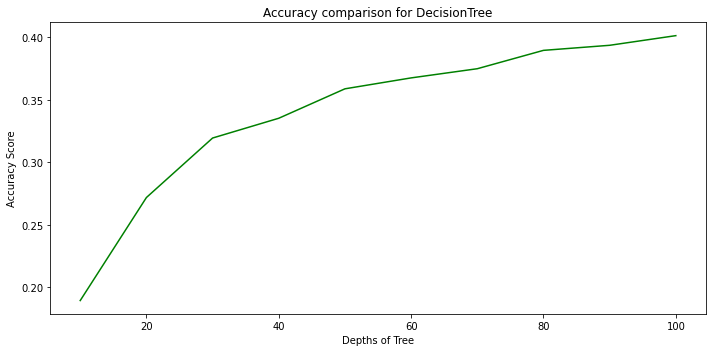

In [34]:
plt.figure(figsize = (10, 5))
plt.plot(depths, acc_score, 'g')
plt.title('Accuracy comparison for DecisionTree')
plt.ylabel('Accuracy Score')
plt.xlabel('Depths of Tree')
plt.tight_layout()
plt.show()

In [35]:
print( "The best accuracy is {:.4f} with depth = {}".format( acc_score.max(), depths[np.argmax(acc_score)] ) ) 

The best accuracy is 0.4013 with depth = 100


**Thus, the decision tree classifier with depth of 25 gives the best classification accuracy.**  
Note: Definitely increasing the depth above 25 will ensure more accuracy, but, will be difficult to study the tree diagram that I am going to plot. One must note the relation between increase in depth and corrseponding increase in accuracy, that becomes negligible after some threshold. For this analysis, I performed different trials and found that threshold is around 100.

In [36]:
# fitting the best decision tree with depth of 
dt_best = DecisionTreeClassifier(max_depth = depths[np.argmax(acc_score)])
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

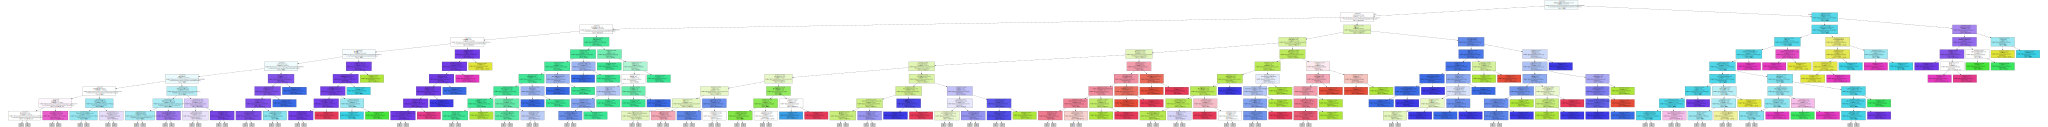

In [37]:
# plotting the whole decision tree
export_graphviz(dt_best,
                feature_names=list(X_train.columns.values),
                out_file="train_tree.dot",
                class_names=np.unique(y_train),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                max_depth=9,
                leaves_parallel=False)

with open("train_tree.dot") as train_tree_image:
    train_tree_graph = train_tree_image.read()
graphviz.Source(train_tree_graph)

**Now let's see the performance of our model on the remaining 20% i.e. test data.**

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
label_names = np.unique(y_test)

Normalized confusion matrix


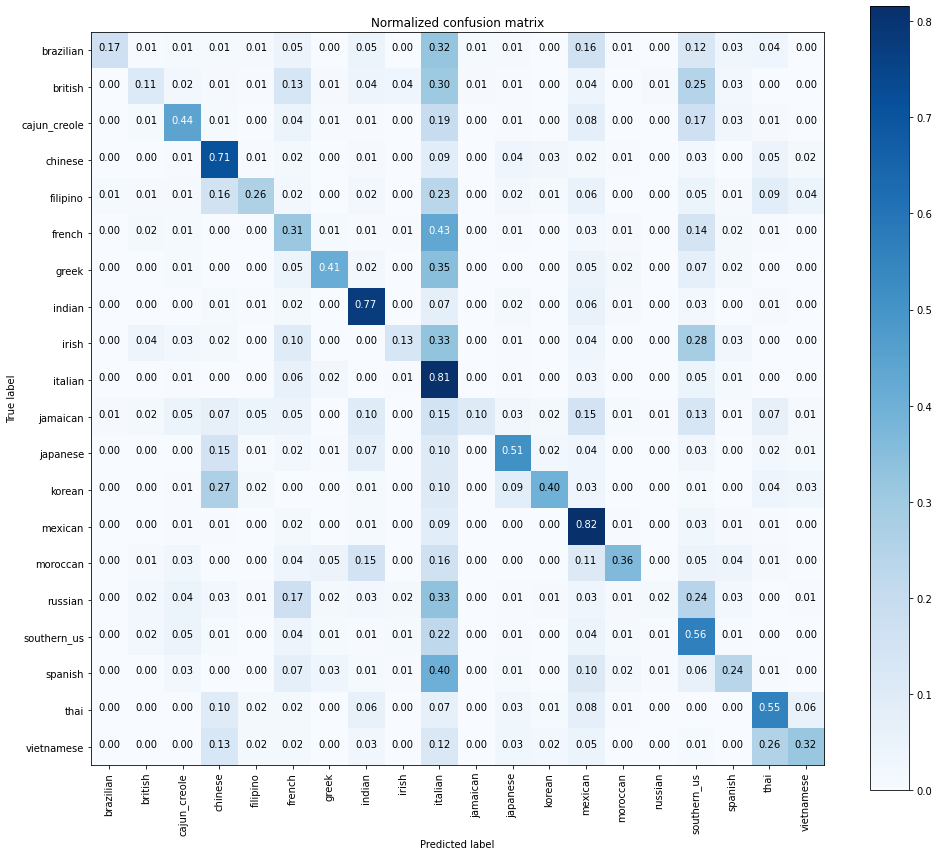

In [40]:
y_pred = dt_best.predict(X_test);
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')

fig.savefig("cuisine_classification_DecisionTree.png", pad_inches=5.0)

<a id="5"></a>
## Conclusion

___

As seen above, our classifier works well some of the cuisines such as "Italian", "Mexican", "Indian" and "Chinese". The reason behind this is their unique ingredients making them distinct as follows:  

**Italian Cuisine:**  
salt (44%) olive oil (39%) garlic cloves (20%) **grated parmesan cheese (20%)** 

**Mexican Cuisine:**  
salt (42%) onions (23%) **ground cumin (20%) garlic (20%)**

**Indian Cuisine:**  
salt (64%) onions (39%) **garam masala (28%)** water (27%) 

**Chinese Cuisine:**  
**soy sauce (50%)** sesame oil (34%) salt (33%) **corn starch (33%)**


**Further Scope**:
Numerous other machine learning classification algorithmms can be applied to create a more accurate cuisine predictor. I will be working on it and will keep updating.

In [41]:
X_train.head()

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonÂ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y_train.head()

0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object

In [43]:
X_test.head()

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,LiptonÂ® Iced Tea Brew Family Size Tea Bags,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
y_test.head()

841      brazilian
20553    brazilian
34090    brazilian
4093     brazilian
37027    brazilian
Name: cuisine, dtype: object

In [48]:
pca = PCA(0.80)
pca.fit(X_train)
n = pca.n_components_
n

498

In [49]:
train_data = pca.transform(X_train)
test_data = pca.transform(X_test)

In [61]:
from sklearn import svm
tic = timeit.default_timer()
svm_fit = svm.SVC(kernel='rbf').fit(X_train, y_train)
svm_pred = svm_fit.predict(X_test)
toc = timeit.default_timer()
print(timedelta(seconds=toc-tic))

3:01:22.897182


In [65]:
print("accuracy_score is ", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

accuracy_score is  0.5120253164556962
              precision    recall  f1-score   support

   brazilian       1.00      0.13      0.23       395
     british       0.65      0.11      0.19       395
cajun_creole       0.83      0.62      0.71       395
     chinese       0.48      0.85      0.62       395
    filipino       0.86      0.42      0.56       395
      french       0.34      0.60      0.44       395
       greek       0.89      0.52      0.66       395
      indian       0.62      0.90      0.73       395
       irish       0.83      0.16      0.26       395
     italian       0.27      0.90      0.41       395
    jamaican       1.00      0.22      0.36       395
    japanese       0.83      0.56      0.67       395
      korean       0.98      0.61      0.75       395
     mexican       0.48      0.92      0.63       395
    moroccan       0.96      0.57      0.72       395
     russian       1.00      0.01      0.02       395
 southern_us       0.24      0.79      0.36

Normalized confusion matrix


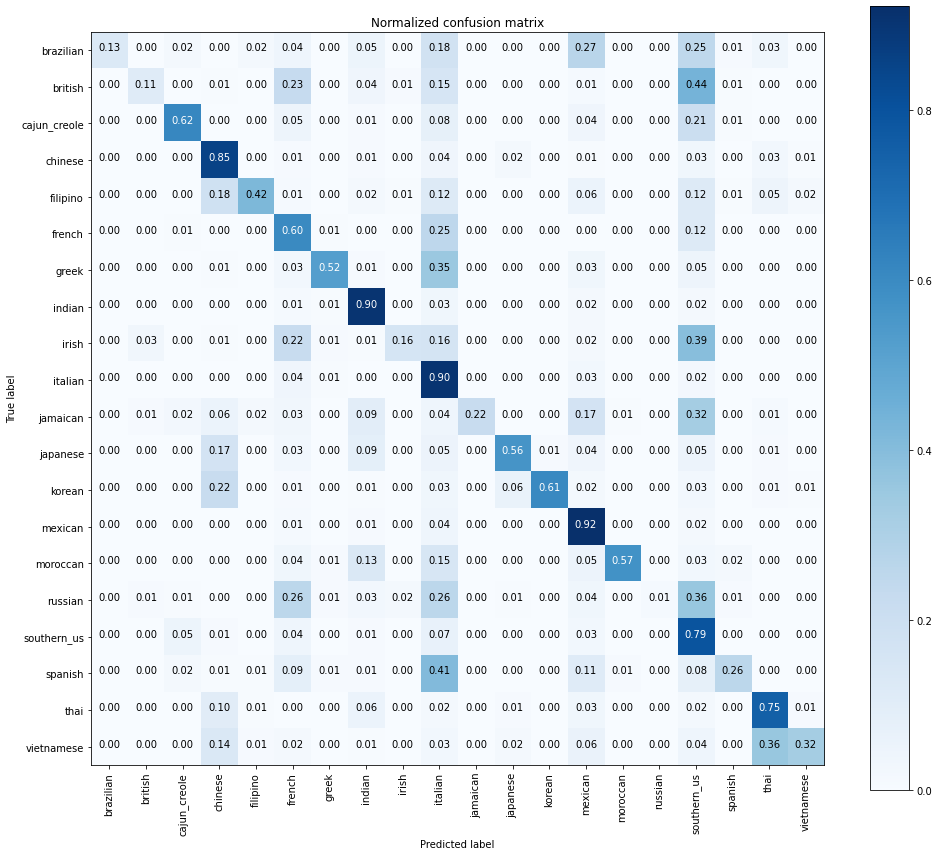

In [63]:
cnf_matrix2 = confusion_matrix(y_test, svm_pred)

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(14, 12, forward=True)
fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix2, classes=np.asarray(label_names), normalize=True,
                      title='Normalized confusion matrix')

# fig.savefig("cuisine_classification_DecisionTree.png", pad_inches=5.0)